In [1]:
import pandas as pd
import numpy as np
import random
import re

import os, sys, glob, pickle

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import IPython.display as ipd

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


RAVEDESS DATA

In [2]:
#Checking the data 

file_path = "../SER/SER-Ravdess-data"

file_directory=os.listdir(file_path)
print('RAVEDESS DATA')
print(file_directory)


RAVEDESS DATA
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [3]:
emotion_list=[]
path_list =[]
Gender = []

for directory in file_directory:
    actor = os.listdir(file_path + '/' + directory)
    for file in actor:
        part = file.split('.')[0].split('-')[2]
        emotion_list.append(int(part))
        gender_id = file.split('.')[0].split('-')[6]
        gender_id = int(gender_id)
        if gender_id%2 == 0:
            Gender.append('female')
        else:
            Gender.append('male')
            
        
        path_list.append(file_path + '/' + directory + '/' + file)

# dataframe for emotion of files
Ravdess_df = pd.DataFrame({'Emotions':emotion_list, 'Gender':Gender,'Path':path_list})
Ravdess_df.Emotions.replace({1:'calm', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df['Emotion'] =Ravdess_df['Gender'] + '_'+ Ravdess_df['Emotions']
Ravdess_df.drop(['Emotions','Gender'],axis=1,inplace=True)
Ravdess_df.sample(5)

    

,Path,Emotion
1360,../SER/SER-Ravdess-data/Actor_23/03-01-06-02-0...,male_fear
399,../SER/SER-Ravdess-data/Actor_07/03-01-06-01-0...,male_fear
556,../SER/SER-Ravdess-data/Actor_10/03-01-03-02-0...,female_happy
470,../SER/SER-Ravdess-data/Actor_08/03-01-07-02-0...,female_disgust
1140,../SER/SER-Ravdess-data/Actor_20/03-01-01-01-0...,female_calm


In [4]:
Ravdess_df['Emotion'] .value_counts()

male_calm          144
female_calm        144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: Emotion, dtype: int64

SAVEE DATA

In [5]:
SAVEE_path = "../SER/SAVEE"
savee_directory=os.listdir(SAVEE_path)

In [6]:
SAVEE_emotion=[]
path_SAVEE =[]

for files in savee_directory:
    path_SAVEE.append(SAVEE_path +'/'+ files )
    
    splitted = files.split('_')[1].split('.')[0]
    splitted = re.findall(r'(\w+?)(\d+)',splitted)[0][0]
    if splitted == 'a':
        SAVEE_emotion.append('male_angry')
    elif splitted == 'd':
        SAVEE_emotion.append('male_disgust')
    elif splitted == 'f':
        SAVEE_emotion.append('male_fear')
    elif splitted == 'h':
        SAVEE_emotion.append('male_happy')
    elif splitted == 'n':
        SAVEE_emotion.append('male_calm')
    elif splitted == 'sa':
        SAVEE_emotion.append('male_sad')
    elif splitted == 'su':
        SAVEE_emotion.append('male_surprise')
    else:
        SAVEE_emotion.append('male_unknown')

SAVEE_df = pd.DataFrame({'Emotion':SAVEE_emotion, 'Path':path_SAVEE})
SAVEE_df.sample(5)


,Emotion,Path
469,male_surprise,../SER/SAVEE/KL_su05.wav
87,male_calm,../SER/SAVEE/DC_n28.wav
37,male_fear,../SER/SAVEE/DC_f08.wav
381,male_disgust,../SER/SAVEE/KL_d07.wav
309,male_calm,../SER/SAVEE/JK_n10.wav


In [7]:
SAVEE_df['Emotion'] .value_counts()

male_calm        120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: Emotion, dtype: int64

TESS DATA

In [8]:
TESS_path = "../SER/TESS Toronto emotional speech set data"

TESS_directory=os.listdir(TESS_path)
print('TESS DATA')
print(TESS_directory)

TESS DATA
['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [9]:
Tess_emotion=[]
path_Tess =[]
for directory in TESS_directory:
    speech = os.listdir(TESS_path + '/' + directory)
    for file in speech:
        part = file.split('_')[2].split('.')[0]
        if part == 'ps':
            Tess_emotion.append('female_surprise')
        elif part == 'neutral':
            Tess_emotion.append('female_calm')
        else: 
            Tess_emotion.append('female_'+part)
        path_Tess.append(TESS_path + '/' + directory + '/' + file)

# dataframe for emotion of files
Tess_df = pd.DataFrame({'Emotion':Tess_emotion, 'Path':path_Tess})
Tess_df.sample(5)

,Emotion,Path
979,female_calm,../SER/TESS Toronto emotional speech set data/...
2186,female_happy,../SER/TESS Toronto emotional speech set data/...
2163,female_happy,../SER/TESS Toronto emotional speech set data/...
2595,female_surprise,../SER/TESS Toronto emotional speech set data/...
968,female_calm,../SER/TESS Toronto emotional speech set data/...


In [10]:
Tess_df['Emotion'].value_counts()

female_angry       400
female_disgust     400
female_fear        400
female_happy       400
female_calm        400
female_surprise    400
female_sad         400
Name: Emotion, dtype: int64

CREMA_D DATA

In [11]:
CREMA_path = "../SER/CREMA"

CREMA_directory=os.listdir(CREMA_path)
# print('CREMA DATA')
# print(CREMA_directory)

In [12]:
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
len(female)          

43

In [13]:
CREMA_emotion=[]
path_CREMA =[]
CREMA_Gender = []
for file in CREMA_directory:
    path_CREMA.append(CREMA_path + '/' + file)
    part = file.split('_')[2]
    gender_id = file.split('_')[0]
    gender_id = int(gender_id)
    if gender_id in female:
        CREMA_Gender.append('female')
    else:
        CREMA_Gender.append('male')
    if part == 'ANG':
        CREMA_emotion.append('angry')
    elif part == 'DIS':
        CREMA_emotion.append('disgust')
    elif part == 'FEA':
        CREMA_emotion.append('fear')
    elif part == 'HAP':
        CREMA_emotion.append('happy')
    elif part == 'NEU':
        CREMA_emotion.append('calm')
    elif part == 'SAD':
        CREMA_emotion.append('sad')
    else:
        CREMA_emotion.append('unknown')
CREMA_df = pd.DataFrame({'Emotions':CREMA_emotion, 'Path':path_CREMA,'Gender':CREMA_Gender})
CREMA_df['Emotion'] =CREMA_df['Gender'] + '_'+ CREMA_df['Emotions']
CREMA_df.drop(['Emotions','Gender'],axis=1,inplace=True)
CREMA_df.sample(5)

,Path,Emotion
3788,../SER/CREMA/1047_ITS_DIS_XX.wav,female_disgust
5975,../SER/CREMA/1074_IEO_ANG_MD.wav,female_angry
5080,../SER/CREMA/1063_IEO_HAP_HI.wav,female_happy
6358,../SER/CREMA/1078_TIE_ANG_XX.wav,female_angry
6309,../SER/CREMA/1078_IEO_HAP_HI.wav,female_happy


In [14]:
CREMA_df['Emotion'].value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_calm         575
female_calm       512
Name: Emotion, dtype: int64

In [15]:
combo_data = pd.concat([SAVEE_df, Tess_df, CREMA_df, Ravdess_df],axis=0)
combo_data.to_csv('combined_data.csv',index=False)
combo_data.sample(5)


,Emotion,Path
423,male_calm,../SER/SAVEE/KL_n04.wav
984,male_sad,../SER/SER-Ravdess-data/Actor_17/03-01-04-02-0...
1882,female_happy,../SER/CREMA/1024_IEO_HAP_HI.wav
1772,male_sad,../SER/CREMA/1022_TIE_SAD_XX.wav
2505,female_surprise,../SER/TESS Toronto emotional speech set data/...


In [16]:
combo_data.Emotion.value_counts()

female_angry       1096
female_disgust     1096
female_fear        1096
female_happy       1096
female_sad         1096
female_calm        1056
male_calm           839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: Emotion, dtype: int64

EDA

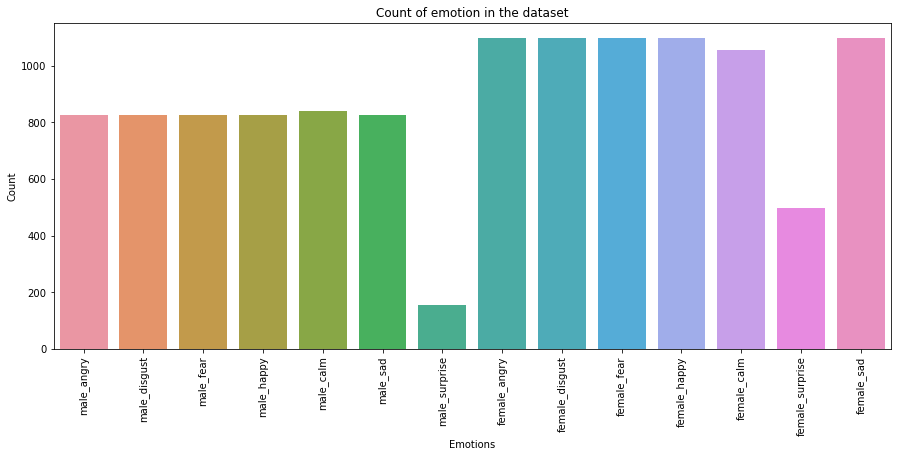

In [17]:
plt.figure(figsize=(15,6))
plt.title('Count of emotion in the dataset')
sns.countplot(combo_data.Emotion)
plt.ylabel('Count')
plt.xlabel('Emotions')
plt.xticks(rotation=90)
plt.show()

In [21]:
np.array(combo_data['Path'])

array(['../SER/SAVEE/DC_a01.wav', '../SER/SAVEE/DC_a02.wav',
       '../SER/SAVEE/DC_a03.wav', ...,
       '../SER/SER-Ravdess-data/Actor_24/03-01-08-02-01-02-24.wav',
       '../SER/SER-Ravdess-data/Actor_24/03-01-08-02-02-01-24.wav',
       '../SER/SER-Ravdess-data/Actor_24/03-01-08-02-02-02-24.wav'],
      dtype=object)

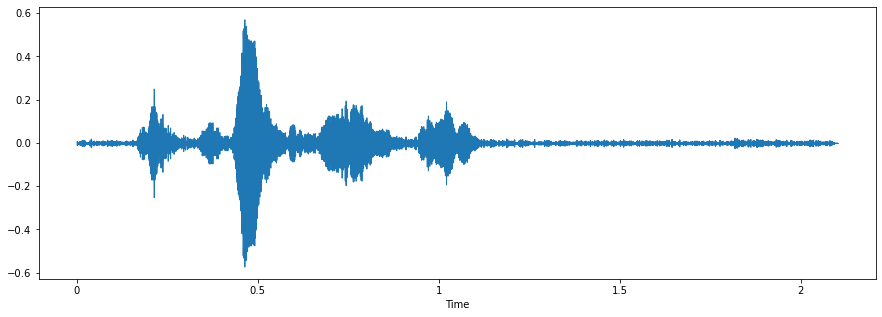

In [33]:
voice_rec = random.choice( np.array(combo_data['Path']) )
# voice_rec
data, sampling_rate = librosa.load(voice_rec)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(voice_rec)

MFCC 2 genders and emotions

-------------Female happy voice---------------


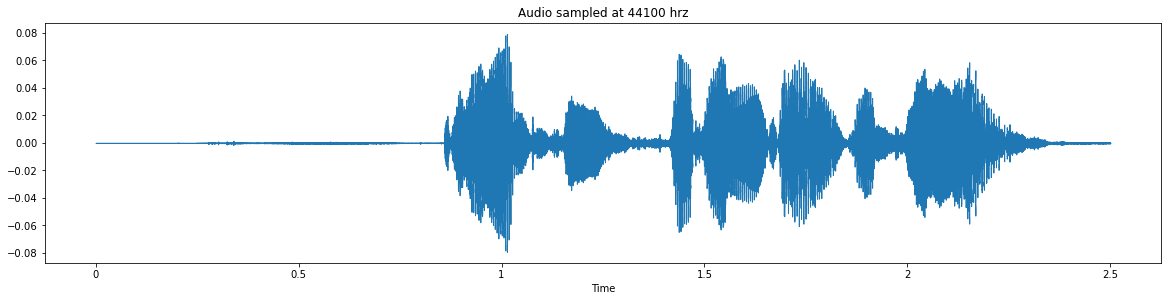

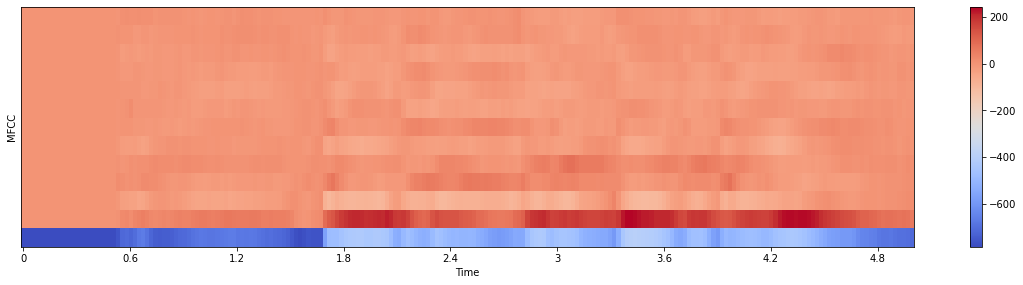

In [38]:
audio_path = "../SER/SER-Ravdess-data/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_best',duration=2.5,sr=22050*2,offset=0.2)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Female happy voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)


-------------Male happy voice---------------


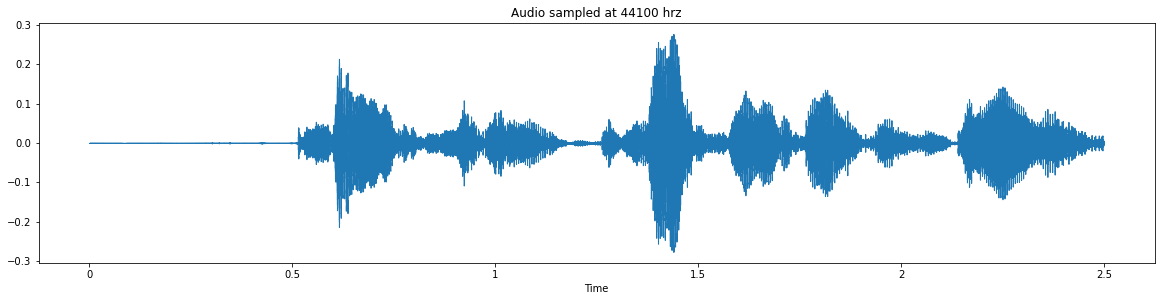

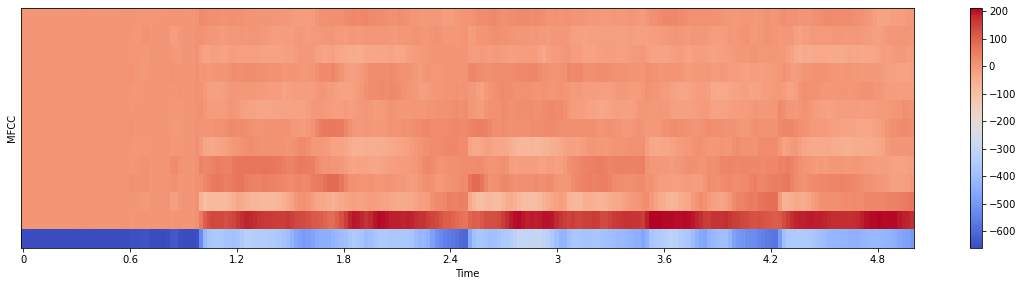

In [39]:
audio_path ="../SER/SER-Ravdess-data/Actor_11/03-01-03-02-01-01-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Male happy voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

-------------Female angry voice---------------


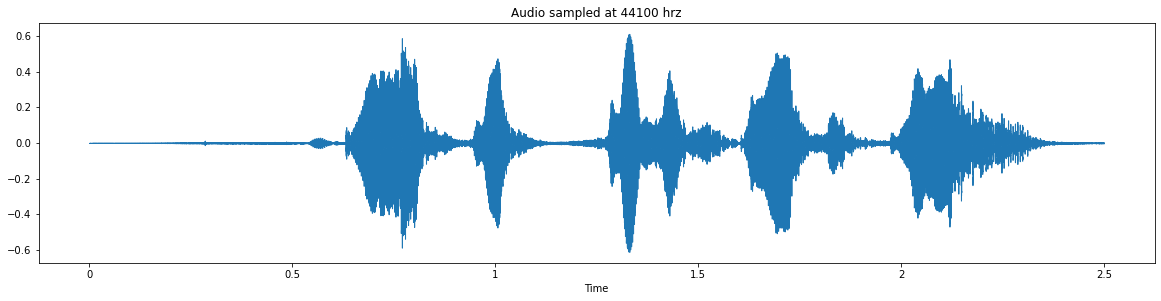

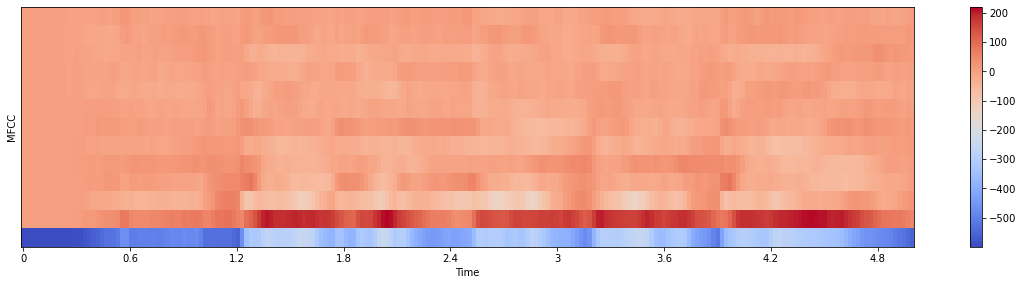

In [40]:
audio_path= "../SER/SER-Ravdess-data/Actor_12/03-01-05-02-02-02-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Female angry voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

-------------Male angry voice---------------


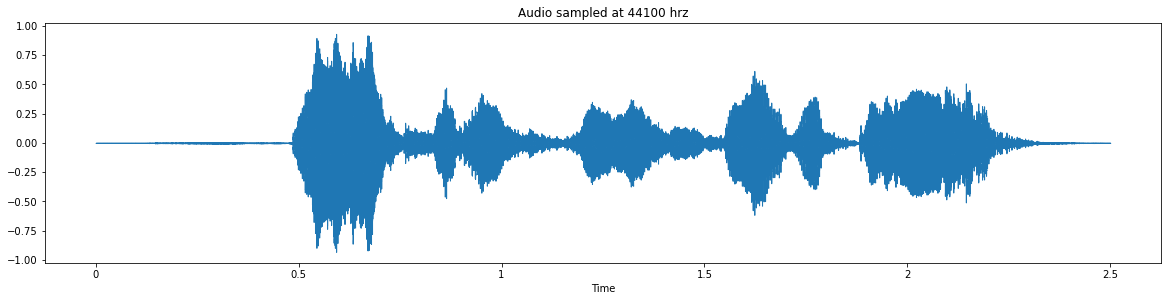

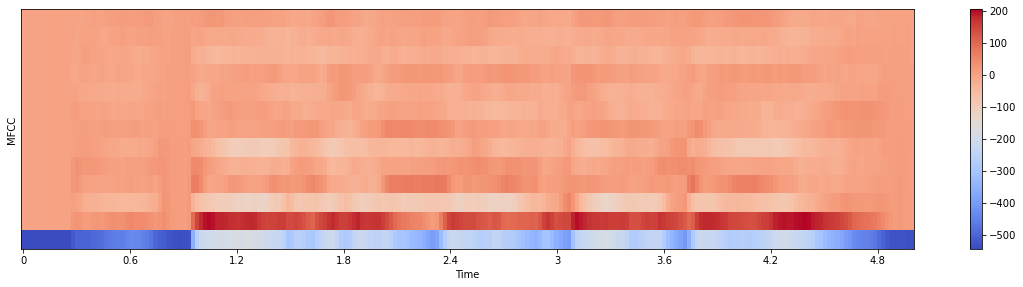

In [41]:
audio_path= "../SER/SER-Ravdess-data/Actor_11/03-01-05-02-02-02-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Male angry voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

Ploting the mean of each band and display it as a timeseries plot

216
216


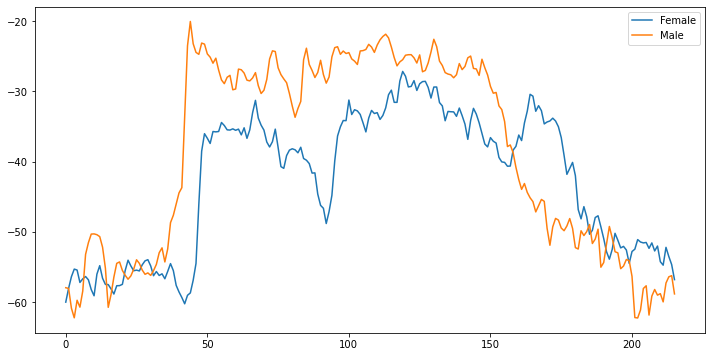

In [42]:
audio_path = "../SER/SER-Ravdess-data/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_female))

audio_path ="../SER/SER-Ravdess-data/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_male))

plt.figure(figsize=(12,6))
# plot()
plt.plot(mean_mfcc_female, label='Female')
plt.plot(mean_mfcc_male, label='Male')
plt.legend()
plt.show()


216
216


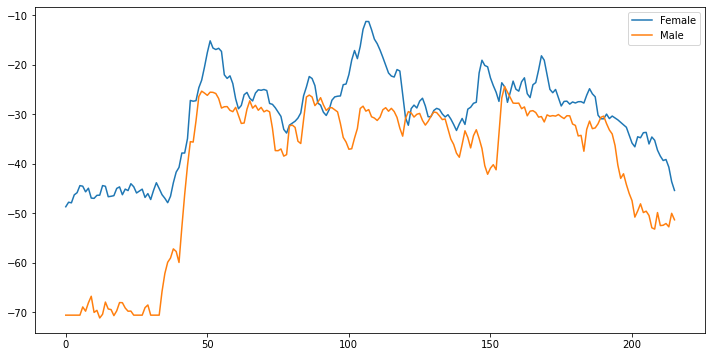

In [43]:
audio_path= "../SER/SER-Ravdess-data/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_female))


audio_path= "../SER/SER-Ravdess-data/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_male))

plt.figure(figsize=(12,6))
# plot()
plt.plot(mean_mfcc_female, label='Female')
plt.plot(mean_mfcc_male, label='Male')
plt.legend()
plt.show()

DATA AUGUMENTATION

In other to ehance the generability of the model, we will go ahead and add some perturbation on the training dataset.

We shall apply noise, strectch, change of pitch 

In [50]:
def noise(data):
    add_noise = 0.035*np.random.uniform()*np.amax(data)
    data = data + add_noise*np.random.normal(size = data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data,sampling_rate,pitch_factor = 0.7):
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

data_path = np.array(combo_data.Path)[10]
data, sample_rate = librosa.load(data_path)



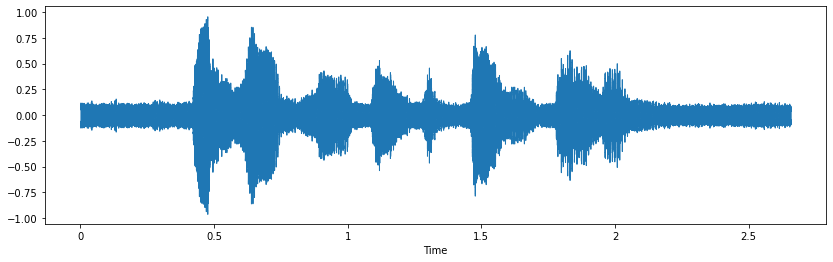

In [49]:
## NOISE

x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr= sample_rate)
ipd.Audio(x,rate=sample_rate)

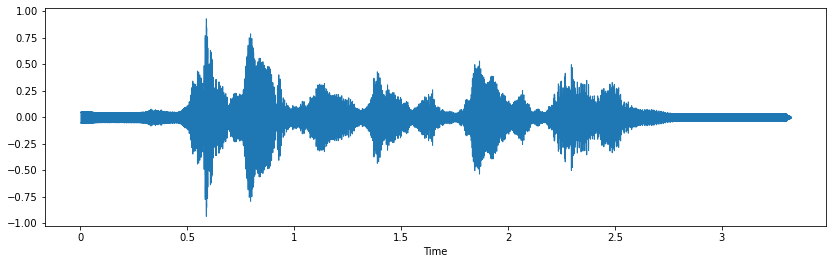

In [51]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr= sample_rate)
ipd.Audio(x, rate=sample_rate )

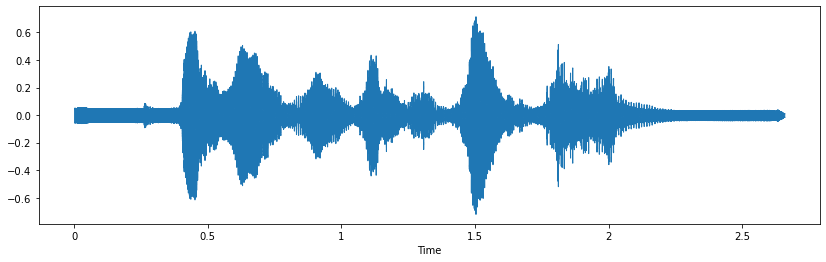

In [52]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [55]:
def feature_extration(data):
    # Zero Crossing Rate (ZCR)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis = 0)
    result = np.hstack((result,zcr))
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result


In [54]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = feature_extration(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = feature_extration(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extration(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [192]:
X, Y = [], []
for path, emotion in zip(combo_data.Path, combo_data.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [193]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.038891,0.470774,0.580054,0.556175,0.485266,0.460437,0.484227,0.506239,0.460555,0.536101,...,0.000008,0.000002,0.000001,0.000001,1.059649e-06,8.348291e-07,4.372123e-07,1.530506e-07,5.519172e-08,male_angry
1,0.038891,0.471844,0.581388,0.557589,0.486870,0.462058,0.484785,0.506152,0.460801,0.536167,...,0.000014,0.000009,0.000007,0.000008,7.523579e-06,7.269368e-06,6.906663e-06,6.306139e-06,6.446289e-06,male_angry
2,0.036068,0.337897,0.434097,0.576744,0.553285,0.446121,0.431649,0.449895,0.458030,0.448255,...,0.000013,0.000005,0.000002,0.000001,8.838113e-07,7.072085e-07,4.771167e-07,3.160687e-07,2.672723e-07,male_angry
3,0.033904,0.662632,0.704404,0.622993,0.550236,0.483400,0.450052,0.422976,0.463144,0.555220,...,0.000095,0.000088,0.000079,0.000074,6.454493e-05,4.986126e-05,2.608372e-05,8.606809e-06,2.192711e-06,male_angry
4,0.035278,0.558654,0.687065,0.741958,0.663141,0.590448,0.514050,0.460884,0.441730,0.489820,...,0.000843,0.000767,0.000803,0.000812,7.722663e-04,7.905186e-04,7.610184e-04,7.363253e-04,7.104936e-04,male_angry


In [113]:
df = pd.read_csv('features.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.038891,0.470774,0.580054,0.556175,0.485266,0.460437,0.484227,0.506239,0.460555,0.536101,...,0.000008,0.000002,0.000001,0.000001,1.059649e-06,8.348291e-07,4.372123e-07,1.530506e-07,5.519172e-08,male_angry
1,0.038891,0.471844,0.581388,0.557589,0.486870,0.462058,0.484785,0.506152,0.460801,0.536167,...,0.000014,0.000009,0.000007,0.000008,7.523579e-06,7.269368e-06,6.906663e-06,6.306139e-06,6.446289e-06,male_angry
2,0.036068,0.337897,0.434097,0.576744,0.553285,0.446121,0.431649,0.449895,0.458030,0.448255,...,0.000013,0.000005,0.000002,0.000001,8.838113e-07,7.072085e-07,4.771167e-07,3.160687e-07,2.672723e-07,male_angry
3,0.033904,0.662632,0.704404,0.622993,0.550236,0.483400,0.450052,0.422976,0.463144,0.555220,...,0.000095,0.000088,0.000079,0.000074,6.454493e-05,4.986126e-05,2.608372e-05,8.606809e-06,2.192711e-06,male_angry
4,0.035278,0.558654,0.687065,0.741958,0.663141,0.590448,0.514050,0.460884,0.441730,0.489820,...,0.000843,0.000767,0.000803,0.000812,7.722663e-04,7.905186e-04,7.610184e-04,7.363253e-04,7.104936e-04,male_angry


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36486 entries, 0 to 36485
Columns: 163 entries, 0 to labels
dtypes: float64(162), object(1)
memory usage: 45.4+ MB


In [43]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
count,36486.000000,36486.000000,36486.000000,36486.000000,36486.000000,36486.000000,36486.000000,36486.000000,36486.000000,36486.000000,...,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04,3.648600e+04
mean,0.111261,0.573389,0.591961,0.584213,0.570212,0.579379,0.581694,0.593498,0.606950,0.612182,...,1.699794e-03,1.681569e-03,1.661090e-03,1.629469e-03,1.555999e-03,1.518845e-03,1.462123e-03,1.397817e-03,1.375796e-03,1.371570e-03
std,0.073168,0.122510,0.126044,0.126067,0.130926,0.135584,0.116990,0.114947,0.120275,0.125014,...,7.219697e-03,7.286716e-03,7.332816e-03,7.249313e-03,6.969633e-03,6.875577e-03,6.845810e-03,6.755368e-03,6.745780e-03,6.740746e-03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.054991,0.503907,0.515386,0.507843,0.490460,0.497447,0.515372,0.525604,0.535575,0.540532,...,1.195770e-08,1.080989e-08,9.923909e-09,9.024602e-09,8.486859e-09,8.062423e-09,7.266324e-09,5.810903e-09,4.391532e-09,2.920584e-09
50%,0.085687,0.582801,0.600435,0.593901,0.578869,0.591231,0.595746,0.602479,0.620588,0.631205,...,3.922237e-06,3.312188e-06,2.844780e-06,2.592157e-06,2.506286e-06,2.396724e-06,1.987180e-06,1.127866e-06,3.081213e-07,7.888580e-08
75%,0.149681,0.656134,0.679444,0.672016,0.660383,0.674049,0.664104,0.671150,0.689664,0.701107,...,3.107576e-04,2.974098e-04,2.842253e-04,2.735404e-04,2.547692e-04,2.351214e-04,1.877126e-04,1.202443e-04,8.433323e-05,7.709087e-05
max,0.415488,0.911926,0.966710,0.966038,0.928707,0.949407,0.937781,0.996694,0.996026,0.993362,...,1.441952e-01,2.181053e-01,2.288142e-01,1.497494e-01,1.098865e-01,1.097562e-01,1.076335e-01,1.041420e-01,1.038052e-01,1.056540e-01


In [49]:
# from sklearn.preprocessing import OrdinalEncoder


In [114]:
label = df['labels'].unique()
print(label)
print(len(label))

['male_angry' 'male_disgust' 'male_fear' 'male_happy' 'male_calm'
 'male_sad' 'male_surprise' 'female_angry' 'female_disgust' 'female_fear'
 'female_happy' 'female_calm' 'female_surprise' 'female_sad']
14


DATA PREPARATION

In [128]:
X = df.iloc[:,:-1].values
Y = df['labels'].values

In [120]:
Y.shape

(36486,)

In [60]:
# encoder = OneHotEncoder()
# Y =encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray( )

In [129]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
Y= np_utils.to_categorical(lb.fit_transform(Y))
Y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [130]:
Y.shape

(36486, 14)

In [131]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 14), (9122, 162), (9122, 14))

In [132]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [133]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape,x_test.shape

((27364, 162, 1), (9122, 162, 1))

In [69]:

# optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

In [134]:
from keras import optimizers
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization

In [135]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(x_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_64 (Conv1D)          (None, 162, 256)          2304      
                                                                 
 activation_72 (Activation)  (None, 162, 256)          0         
                                                                 
 conv1d_65 (Conv1D)          (None, 162, 256)          524544    
                                                                 
 batch_normalization_16 (Bat  (None, 162, 256)         1024      
 chNormalization)                                                
                                                                 
 activation_73 (Activation)  (None, 162, 256)          0         
                                                                 
 dropout_16 (Dropout)        (None, 162, 256)          0         
                                                      

In [136]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_test, y_test
))

Epoch 1/100
1711/1711 [==============================] - 469s 269ms/step - loss: 2.3267 - accuracy: 0.2262 - val_loss: 2.2265 - val_accuracy: 0.3651
Epoch 2/100
1711/1711 [==============================] - 458s 268ms/step - loss: 1.9139 - accuracy: 0.3797 - val_loss: 1.8859 - val_accuracy: 0.4321
Epoch 3/100
1711/1711 [==============================] - 458s 268ms/step - loss: 1.6684 - accuracy: 0.4427 - val_loss: 1.6731 - val_accuracy: 0.4763
Epoch 4/100
1711/1711 [==============================] - 457s 267ms/step - loss: 1.5374 - accuracy: 0.4702 - val_loss: 1.5737 - val_accuracy: 0.4981
Epoch 5/100
1711/1711 [==============================] - 438s 256ms/step - loss: 1.4489 - accuracy: 0.4883 - val_loss: 1.5789 - val_accuracy: 0.4806
Epoch 6/100
1711/1711 [==============================] - 316s 185ms/step - loss: 1.3915 - accuracy: 0.5042 - val_loss: 1.4822 - val_accuracy: 0.5139
Epoch 7/100
1711/1711 [==============================] - 341s 199ms/step - loss: 1.3483 - accuracy: 0.5160

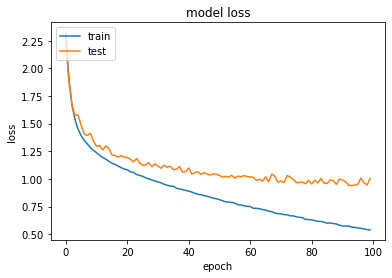

In [137]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [176]:
preds = model.predict(x_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

571/571 [==============================] - 23s 40ms/step


array([ 3,  8, 12, ...,  7, 10,  4], dtype=int64)

In [177]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)

In [178]:
finaldf.sample(10)

,actualvalues,predictedvalues
8189,male_disgust,male_disgust
8970,female_fear,female_fear
6253,female_disgust,female_disgust
1527,male_sad,male_sad
5922,female_happy,female_happy
2381,female_happy,female_calm
2720,male_angry,male_angry
228,female_fear,female_sad
5705,female_happy,female_happy
3282,male_sad,male_sad


In [179]:
finaldf.to_csv('Predictions.csv', index=False)


In [180]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,734
female_calm,613
female_disgust,1137
female_fear,809
female_happy,612
female_sad,605
female_surprise,344
male_angry,594
male_calm,450


In [181]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,5), fontsize=14):
       
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_calm':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_calm' or 'male_disgust':
        return 'male'

In [189]:
finaldf = pd.read_csv("Predictions.csv")

0.6334137250602938


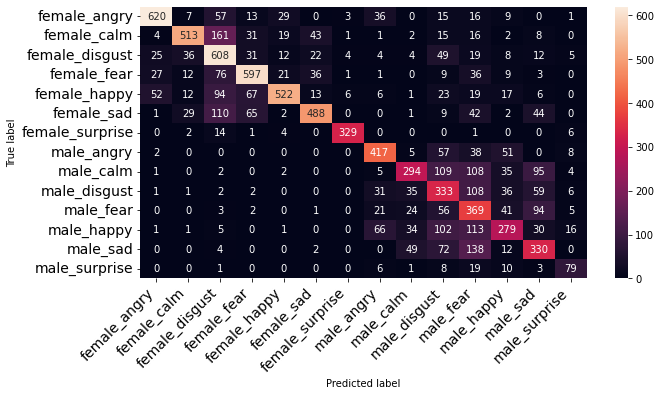

In [182]:
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [183]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.84      0.77      0.81       806
    female_calm       0.84      0.63      0.72       816
 female_disgust       0.53      0.72      0.62       839
    female_fear       0.74      0.72      0.73       828
   female_happy       0.85      0.62      0.72       838
     female_sad       0.81      0.62      0.70       793
female_surprise       0.96      0.92      0.94       357
     male_angry       0.70      0.72      0.71       578
      male_calm       0.65      0.45      0.53       655
   male_disgust       0.39      0.54      0.45       614
      male_fear       0.35      0.60      0.45       616
     male_happy       0.55      0.43      0.48       648
       male_sad       0.48      0.54      0.51       607
  male_surprise       0.61      0.62      0.61       127

       accuracy                           0.63      9122
      macro avg       0.66      0.64      0.64      9122
   weighted avg       0.67   

0.9461740846305635


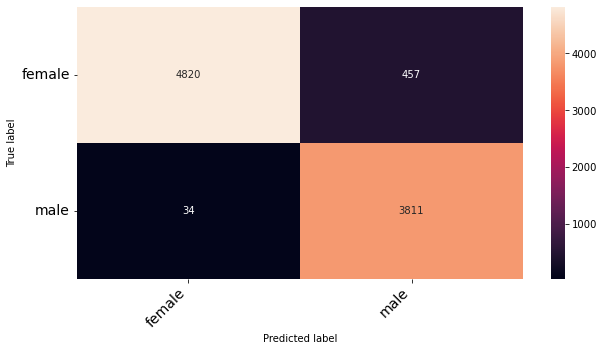

In [190]:
modidf = finaldf.copy()
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_calm':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_calm':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_calm':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_calm':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [191]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.99      0.91      0.95      5277
        male       0.89      0.99      0.94      3845

    accuracy                           0.95      9122
   macro avg       0.94      0.95      0.95      9122
weighted avg       0.95      0.95      0.95      9122



0.6552291164218373


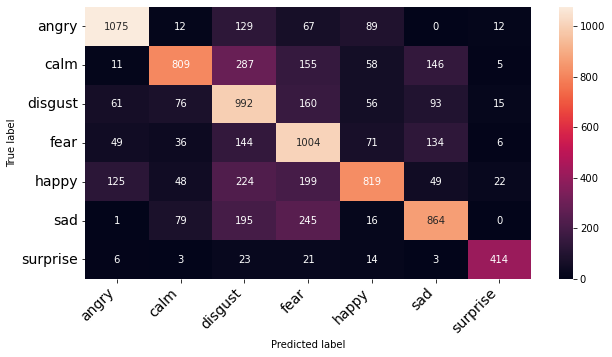

In [192]:
modidff = finaldf.copy()
modidff['actualvalues'] = modidff.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_calm':'calm'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_calm':'calm'
                                       , 'male_disgust':'disgust'
                                      })

modidff['predictedvalues'] = modidff.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_calm':'calm'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_calm':'calm'
                                       , 'male_disgust':'disgust'
                                      })

classess = modidff.actualvalues.unique() 
classess.sort() 
classess

# Confusion matrix 
c = confusion_matrix(modidff.actualvalues, modidff.predictedvalues)
print(accuracy_score(modidff.actualvalues, modidff.predictedvalues))
print_confusion_matrix(c, class_names = classess)

In [ ]:
# sound, saamplerate = librosa.load(f'{file_path}/Actor_01/03-01-01-01-01-01-01.wav')

In [131]:
# print('Vibration sequence:', sound)
# array_len =sound.shape
# print('Sound shape:', array_len)
# print('Sample Rate (Hz):',saamplerate)

# print('Length of Audio:', array_len[0]/saamplerate)

In [130]:
# plt.figure(figsize=(16, 6))
# librosa.display.waveshow(y=sound, sr=saamplerate, color="#2f7d92ff")
# plt.title("Waveform of classical.00003.wav", fontsize=12)  
# plt.show()

In [23]:
# #Loading the data and extraxting the features for each sound file
# def load_data(test_size=0.2):
#     x,y = [],[]
#     for file in glob.glob("../SER/SER-Ravdess-data/Actor_*/*.wav"):
#         file_name = os.path.basename(file)
#         emotion = emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
#         feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
#         x.append(feature)
#         y.append(emotion)
#         # return train_test_split(np.array(x),y,test_size=test_size,random_state=9 )
#         return y